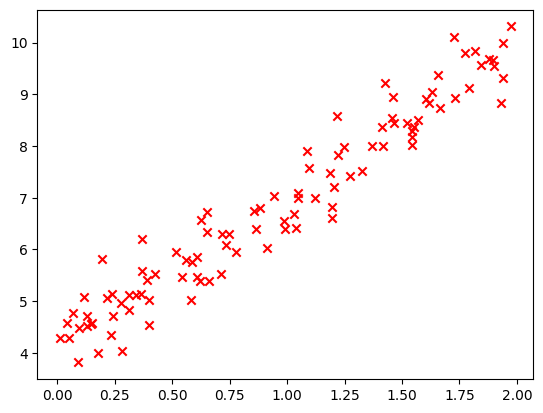

In [59]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) * 2
Y = 4 + 3 * X + np.random.randn(100, 1) * 0.5

plt.scatter(X, Y, marker='x', color="red")

In [63]:
import torch
from torch.utils.data import DataLoader, TensorDataset

x = torch.from_numpy(X).float()
y = torch.from_numpy(Y).float()

dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(w.item(), b.item())

for epoch in range(1000):
    for batch_index, (x_batch, y_batch) in enumerate(dataloader):
        y_pred = x_batch * w + b
        loss = torch.mean((y_pred - y_batch) ** 2)
        loss.backward()
        w.data -= 0.01 * w.grad
        b.data -= 0.01 * b.grad
        w.grad.zero_()
        b.grad.zero_()
        print(f"Epoch {epoch + 1}, batch {batch_index}, Loss {loss.item()}")

0.22219844162464142 -0.6066997051239014
Epoch 1, batch 0, Loss 57.558876037597656
Epoch 1, batch 1, Loss 46.103492736816406
Epoch 1, batch 2, Loss 55.07790756225586
Epoch 1, batch 3, Loss 39.99015808105469
Epoch 1, batch 4, Loss 31.29537582397461
Epoch 1, batch 5, Loss 37.14336395263672
Epoch 1, batch 6, Loss 43.8427619934082
Epoch 2, batch 0, Loss 28.21265983581543
Epoch 2, batch 1, Loss 26.76752471923828
Epoch 2, batch 2, Loss 26.231746673583984
Epoch 2, batch 3, Loss 25.60498046875
Epoch 2, batch 4, Loss 19.601726531982422
Epoch 2, batch 5, Loss 20.509117126464844
Epoch 2, batch 6, Loss 19.85584831237793
Epoch 3, batch 0, Loss 18.417560577392578
Epoch 3, batch 1, Loss 14.984296798706055
Epoch 3, batch 2, Loss 11.502571105957031
Epoch 3, batch 3, Loss 15.615630149841309
Epoch 3, batch 4, Loss 12.707747459411621
Epoch 3, batch 5, Loss 10.529764175415039
Epoch 3, batch 6, Loss 10.226340293884277
Epoch 4, batch 0, Loss 10.442436218261719
Epoch 4, batch 1, Loss 7.961474418640137
Epoch 4,

2.893505573272705 4.107466220855713


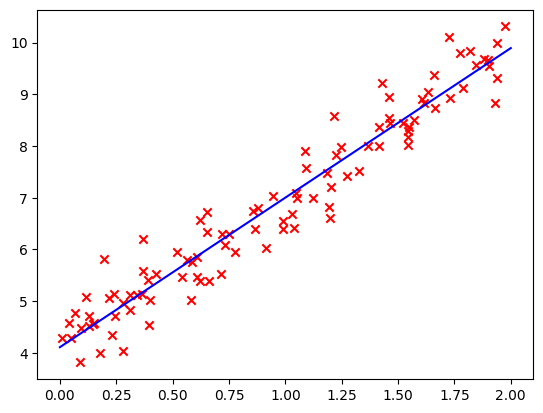

In [65]:
x = np.linspace(0, 2, 100)
h = w.item() * x + b.item()
print(w.item(), b.item())

plt.scatter(X, Y, marker='x', color="red")
plt.plot(x, h, color="blue")